## Sustitución por valores al final de la distribución  ==> Feature Engine


### Qué es Feature Engine?

Feature Engine es una librería de python que hemos creado para apoyar este curso. 

- Feature Engine incluye todas las técnicas de ingeniería de varaibles descritas en este curso
- Feature Engine funciona como Scikit-learn, por lo tanto es fácil de aprender
- Feature Engine te permite implementar pasos de ingeniería de variables espeficos para segmentos de datos específicos
- Feature Engine puede ser integrado con los flujos de trabajo de Scikit-learn pipeline permitiendo construir modelos facilmente
- 
**Feature Engine te permite diseñar y guardar un flujo de ingeneria de variables con procesos disenados especificamente para los diferentes grupos de variables.**

-------------------------------------------------------------------
Feature Engine puede ser instalado vía pip ==> pip install feature-engine

- Asegurate que haz instalado feature-engine antes de correr este notebook

Para más detalle visita nuestro website


## En este demo:

Vamos a usar **Feature Engine para hacer la sustitución por valores al final de la distribución** usando los datos Ames House Price.

- Para bajar los datos, por favor referirse a la clase en **Datasets** en la  **Sección 1** del curso.

### Nota: 
* 'Imputer' se deriva del verbo en inglés 'to impute' que quiere decir sustituir o reemplazar. Imputer es el objeto que completa la sustitución, de ahi el nombre dado a la clase.



In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# from feature engine
from feature_engine import missing_data_imputers as mdi

In [16]:
# carguemos los datos con unas columnas seleccionadas

cols_to_use = [
    'BsmtQual', 'FireplaceQu', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt',
    'SalePrice'
]

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)
data.head()

,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,GarageYrBlt,SalePrice
0,65.0,196.0,Gd,NaN,2003.0,208500
1,80.0,0.0,Gd,TA,1976.0,181500
2,68.0,162.0,Gd,TA,2001.0,223500
3,60.0,0.0,TA,Gd,1998.0,140000
4,84.0,350.0,Gd,TA,2000.0,250000


In [17]:
data.isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
BsmtQual       0.025342
FireplaceQu    0.472603
GarageYrBlt    0.055479
SalePrice      0.000000
dtype: float64

Todas las variables predictivas tienen datos ausentes

In [18]:
# separar datos en segmentos entrenamiento y prueba

# primero, separemos el target (SalePrice) del resto de las variables (features)

cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 5), (438, 5))

### Feature Engine captura las variables numéricas automáticamente

In [19]:
# llamemos el imputer de feature engine
# especifiquemos si queremos encontrar los valores usando una
# aproximación de una distribución gaussiana o la regla de 
# prozximidad del rango intercuantil

# adicionalmente tenemos que especificar si queremos los valores al principio o al final
# de la distribución
imputer = mdi.EndTailImputer(distribution='gaussian', tail='right')

In [20]:
# ajustamos el imputer

imputer.fit(X_train)

EndTailImputer(distribution='gaussian', fold=3, tail='right',
               variables=['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])

In [21]:
# vemos que el imputer encontró las variables numéricas 
# para sustituir con valores al final de la distribución

imputer.variables

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [22]:
# aqui podemos ver los valores que serán usados para reemplazar los v
# valores nulos NA para cada variable
imputer.imputer_dict_

{'LotFrontage': 138.9022201686726,
 'MasVnrArea': 648.3947111415157,
 'GarageYrBlt': 2052.9707419772235}

In [23]:
# y asi es como estas varaibles son calculadas
# que es precisamente la forma que aprendimos en los 
# primeros notebooks de esta sección

X_train[imputer.variables].mean() + 3 * X_train[imputer.variables].std()

LotFrontage     138.902220
MasVnrArea      648.394711
GarageYrBlt    2052.970742
dtype: float64

In [24]:
# feature engine retorna un dataframe

tmp = imputer.transform(X_train)
tmp.head()

,BsmtQual,FireplaceQu,LotFrontage,MasVnrArea,GarageYrBlt
64,Gd,NaN,138.90222,573.0,1998.000000
682,Gd,Gd,138.90222,0.0,1996.000000
960,TA,NaN,50.00000,0.0,2052.970742
1384,TA,NaN,60.00000,0.0,1939.000000
1100,TA,NaN,60.00000,0.0,1930.000000


In [25]:
# revisemos que las variables numéricas ya no tienen NA
tmp[imputer.variables].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
GarageYrBlt    0.0
dtype: float64

## Feature engine te permite especificar grupos de variables fácilmente

In [26]:
# usemos la sustitución pero esta vez solo 
# usemos  2 de la 3 variables numéricas

# seleccionemos la regla de la proximidad para la cosa de la izquierda

imputer = mdi.EndTailImputer(distribution='skewed', tail='left',
                             variables=['LotFrontage', 'MasVnrArea'])

imputer.fit(X_train)

EndTailImputer(distribution='skewed', fold=3, tail='left',
               variables=['LotFrontage', 'MasVnrArea'])

In [27]:
# ahora el imputer solo tiene las variable que le indicamos
imputer.variables

['LotFrontage', 'MasVnrArea']

In [28]:
# y podemos ver el valor asignado para cada variable

imputer.imputer_dict_

{'LotFrontage': -8.0, 'MasVnrArea': -510.0}

In [29]:
# feature engine devuelve un dataframe

tmp = imputer.transform(X_train)

# revisemos que los valores nulos ya no existen
tmp[imputer.variables].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
dtype: float64

## Feature engine puede ser usado con los flujos de Scikit-learn (pipeline)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11134a198>,
      dtype=object)

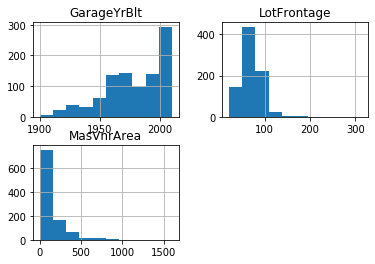

In [30]:
# miremos las distribuciones y determinemos el valor para el método de sustitucion al 
#final de la distribución 

X_train.hist()

Todas las varaibles están sesgadas. EN este demo, usaremos la regla de la proximidad GarageYrBlt y MasVnrArea, y una aproximación gaussiana para LotFrontage.

In [31]:
pipe = Pipeline([
    ('imputer_skewed', mdi.EndTailImputer(distribution='skewed', tail='right',
                                          variables=['GarageYrBlt', 'MasVnrArea'])),

    ('imputer_gaussian', mdi.EndTailImputer(distribution='gaussian', tail='right',
                                            variables=['LotFrontage'])),
])

In [32]:
pipe.fit(X_train)

Pipeline(memory=None,
         steps=[('imputer_skewed',
                 EndTailImputer(distribution='skewed', fold=3, tail='right',
                                variables=['GarageYrBlt', 'MasVnrArea'])),
                ('imputer_gaussian',
                 EndTailImputer(distribution='gaussian', fold=3, tail='right',
                                variables=['LotFrontage']))],
         verbose=False)

In [33]:
pipe.named_steps['imputer_skewed'].imputer_dict_

{'GarageYrBlt': 2121.0, 'MasVnrArea': 680.0}

In [34]:
pipe.named_steps['imputer_gaussian'].imputer_dict_

{'LotFrontage': 138.9022201686726}

In [35]:
# transformemos los datos con la tuberia o pipeline
tmp = pipe.transform(X_train)

#revisemos que ya no tenemos valores nulos
tmp.isnull().mean()

BsmtQual       0.023483
FireplaceQu    0.467710
LotFrontage    0.000000
MasVnrArea     0.000000
GarageYrBlt    0.000000
dtype: float64

Ya no tenemos valores nulos para ninguna de las 3 variables numericas que sustituimos

